### Структура и цель проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

* Описание данных:
1. Name — название игры
2. Platform — платформа
3. Year_of_Release — год выпуска
4. Genre — жанр игры
5. NA_sales — продажи в Северной Америке (миллионы проданных копий)
6. EU_sales — продажи в Европе (миллионы проданных копий)
7. JP_sales — продажи в Японии (миллионы проданных копий)
8. Other_sales — продажи в других странах (миллионы проданных копий)
9. Critic_Score — оценка критиков (максимум 100)
10. User_Score — оценка пользователей (максимум 10)
11. Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
* План: 
1. Просмотреть данные и выполнить предобработку.
2. Провести исследовательский анализ
3. Составить портрет пользователей регионов
4. Проверить гипотезу
5. Написать общий вывод

# Шаг 1 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [3]:
data = pd.read_csv('/datasets/games.csv')

In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

# Шаг 2

In [7]:
#Замена названий столбцов на нижний регистр
data.columns = data.columns.str.lower()

In [8]:
#Удалим незначительные количественно пропуски с годом выпуска и приведем их к типу данных int
data.dropna(subset=['year_of_release'], inplace=True)
data['year_of_release'] = data['year_of_release'].astype('int')

In [9]:
data.dropna(subset=['name'], inplace=True)
data.dropna(subset=['genre'], inplace=True)

In [10]:
# Заменил значения в столбце с оценков пользователей со значением tbd(поделжит уточнению) на NaN и привел к типу данных float
data['user_score'] = data['user_score'].replace("tbd", np.NaN)
data['user_score'] = data['user_score'].astype('float')

In [11]:
data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
data[data['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [14]:
data['rating'] = data['rating'].str.replace('K-A', 'E')
data['rating'] = data['rating'].str.replace('EC', 'E')

In [15]:
data['rating']=data['rating'].fillna('NR')

**Убрали незначительные пропуски в столбце года выпуска, остальные пропуски(critic_score, user_score, rating) оставлю незаполеными, т.к заполнять их будет некорректно. Пропуски в critic_score, user_score вероятнее всего из-за того, что игры были выпущены очень давно и тогда еще не было платформ для критик, либо по причине того, что имели очень мало продаж и в них просто возможно отсутсвие оценок как таковых, а отсутсвие в 2016 году связано с неполной выгрузкой за 2016**

### Шаг 3

In [16]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

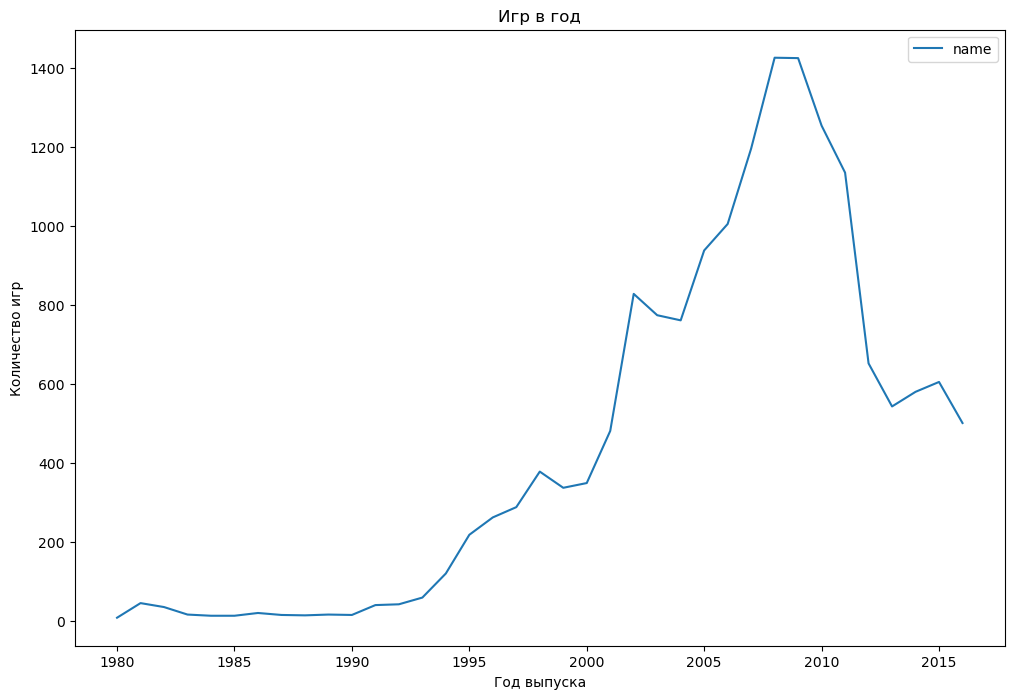

In [17]:
games_per_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_per_year.plot(figsize=(12,8))
plt.title('Игр в год')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

*С 1994 количество выпускаемых игр начинает расти, но после 2000 рост становится существенно выше*

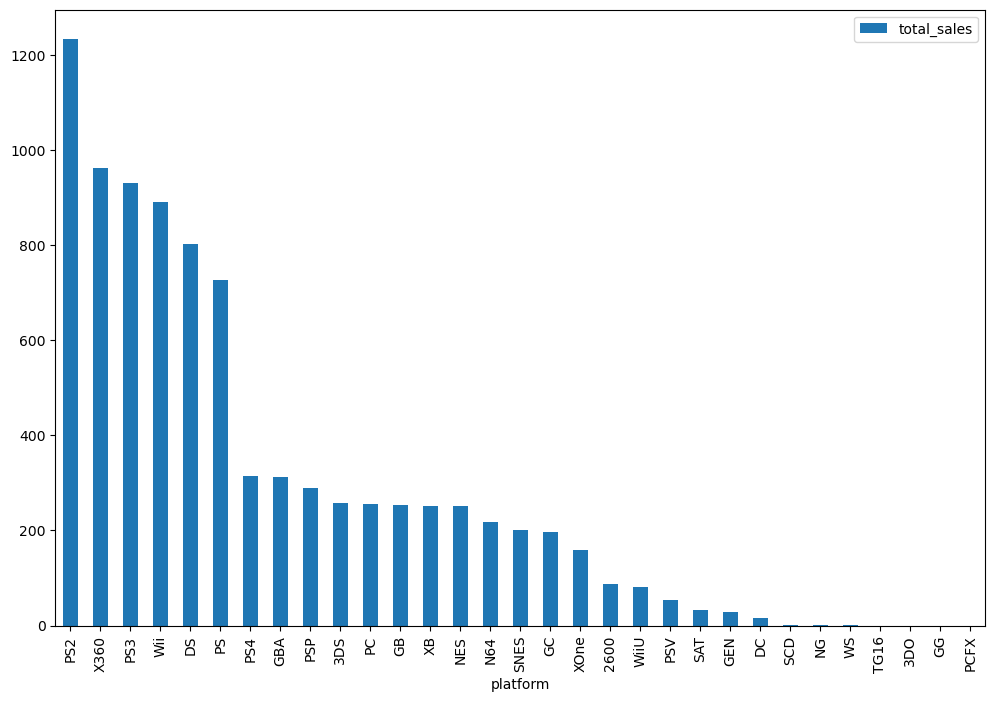

In [18]:
platform_sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
platform_sales.plot(kind='bar',figsize=(12,8))
plt.show()

*Самые популярные платформы это PS2, XBOX360, PS3, Wii, DS, PS*

In [19]:
top_platforms = platform_sales.head(6)
top_platforms

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58


In [20]:
#создадим датасет с актуальным периодом
data_a = data[data['year_of_release'] >= 2012]

In [21]:
top_actually_platforms = data_a['platform'].unique()

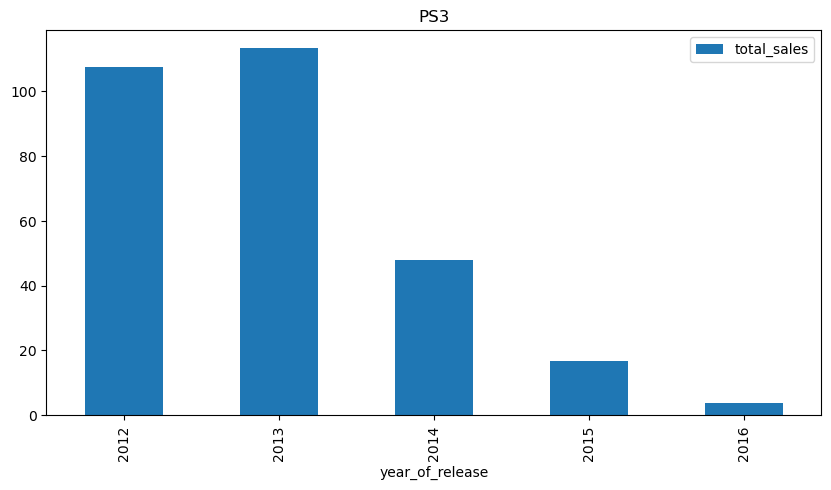

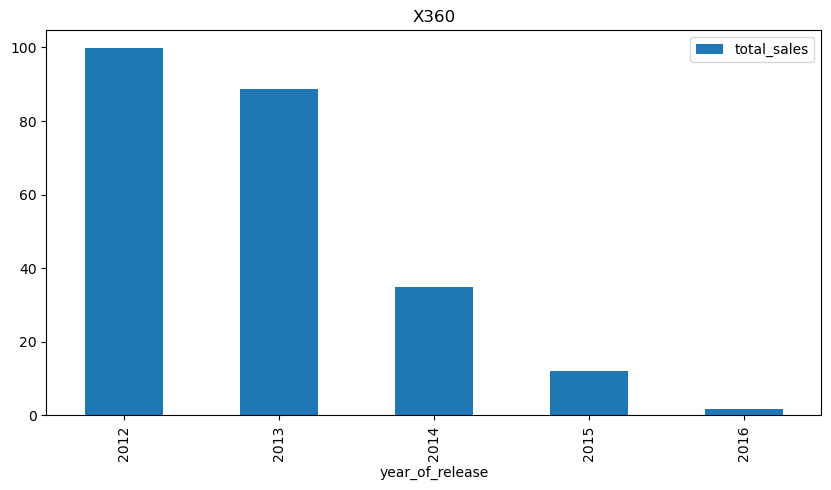

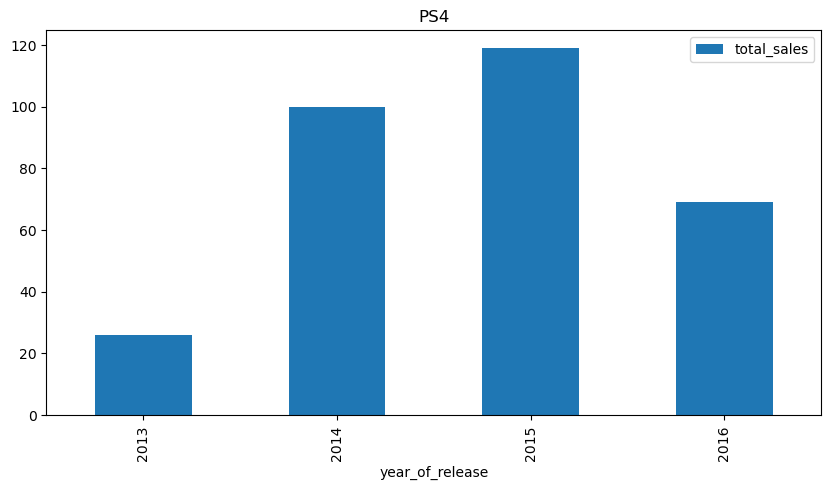

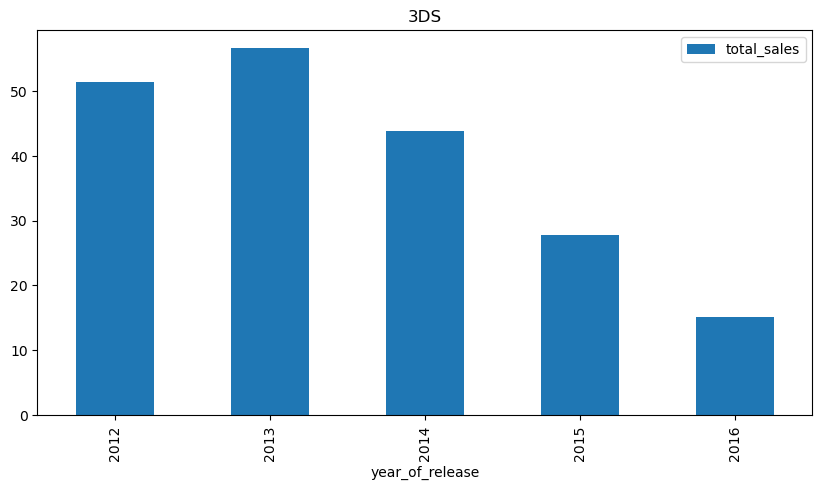

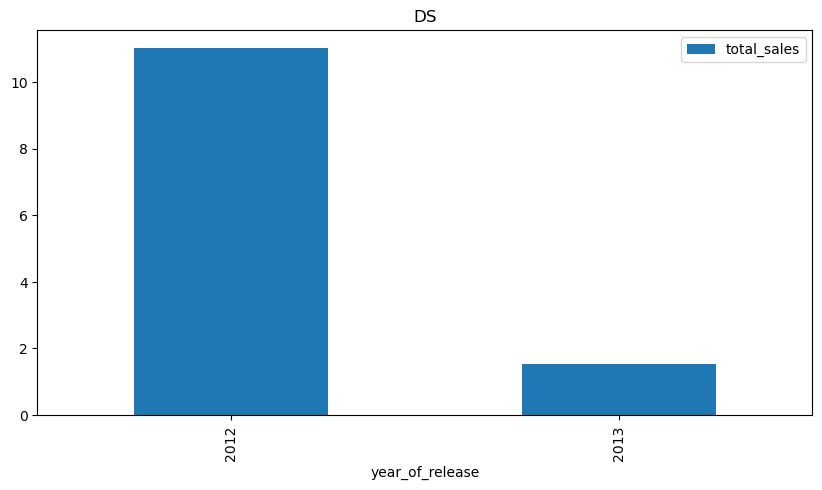

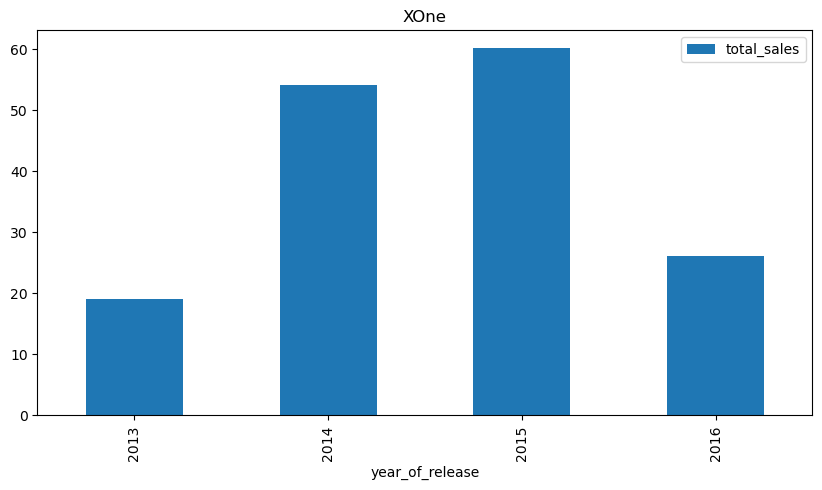

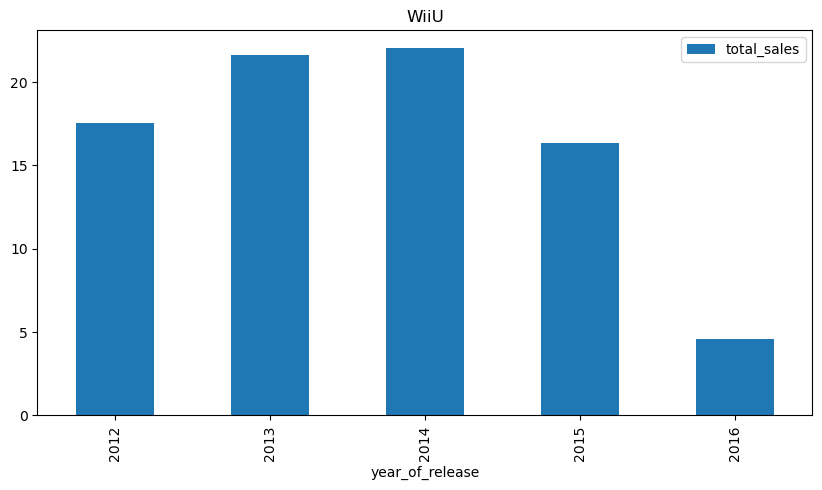

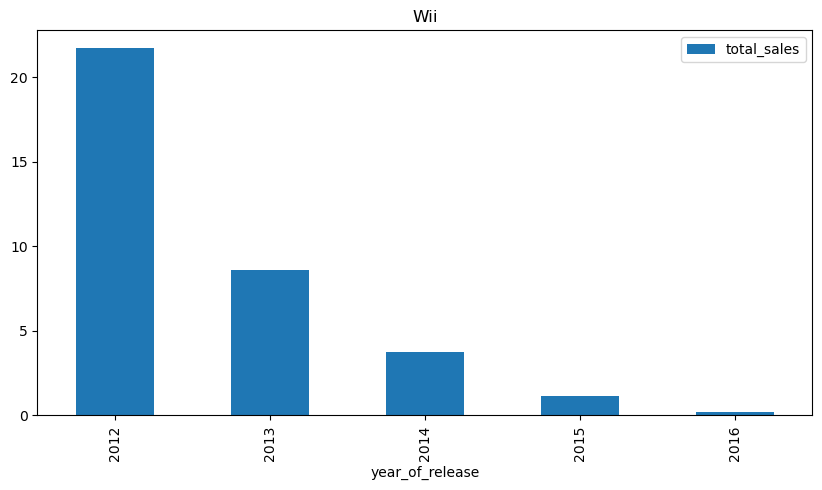

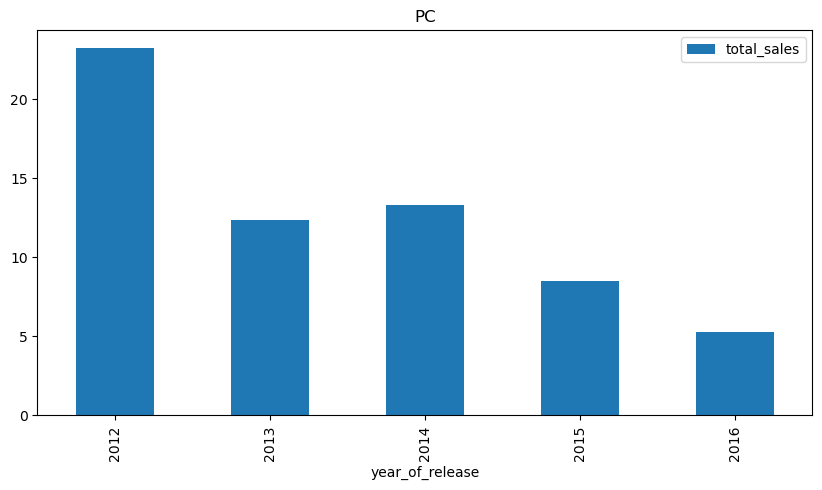

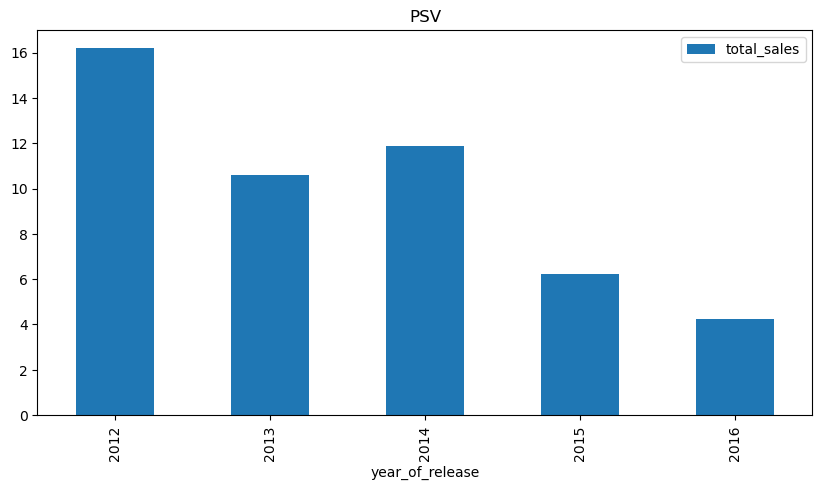

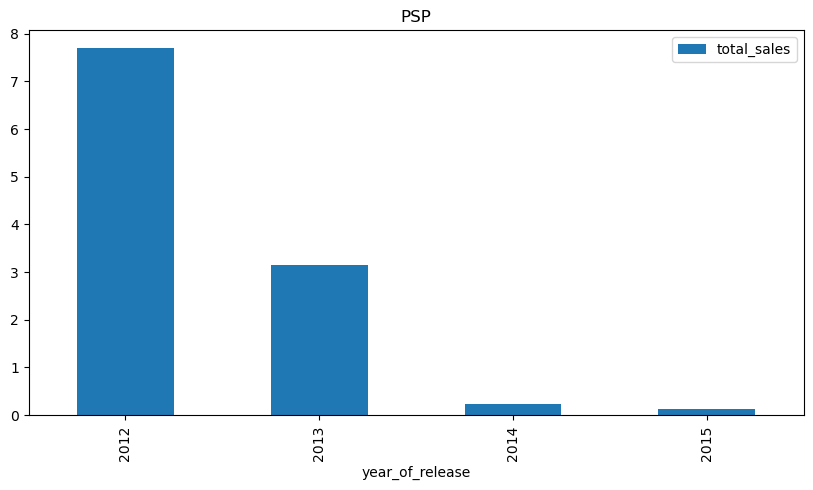

In [22]:
for i in top_actually_platforms:
    data_a[data_a['platform'] == i].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(10,5))
    plt.title(i)

**Лидерами к 2016 году являются PS4, XOne, 3DS. У платформы 3DS продажи падают, а XOne и PS4 растут, в 2016 у них виден спад, но думаю это из-за неполной выгрузки данных к 2016, а не из-за того что продажи падают. По PC наверно можно сказать, что игры там реже покупаются из-за возможности пиратсва, так же меньшей стоимости игр и имеют и меньшую популярность, чем приставки. А остальные платформы изживают себя.** 
**Из них отберем те, которые еще продолжают конкурировать**
* PS4
* PC
* XOne
* WiiU
* PSV

In [23]:
top_actually_platforms = data_a[data_a['platform'].isin(['PS4','XOne','PC','WiiU', 'PSV'])]

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

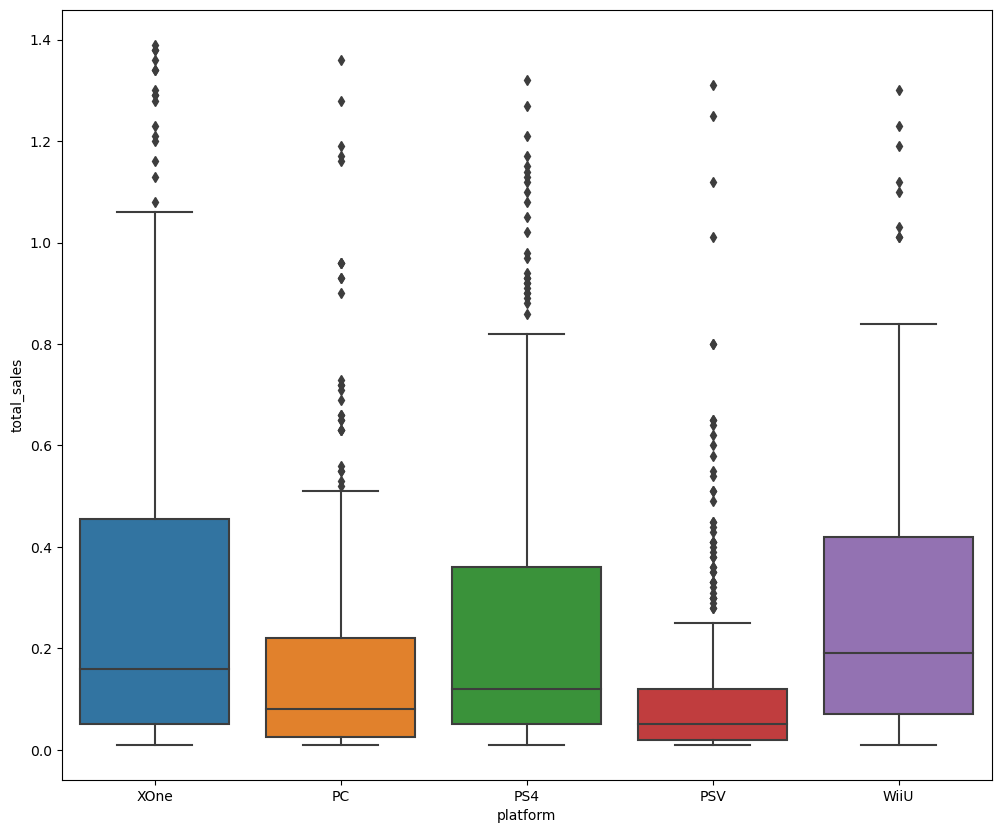

In [26]:
top_platforms_fix = top_actually_platforms[top_actually_platforms['total_sales']<1.4]
plt.figure(figsize=(12,10))
sns.boxplot(data=top_platforms_fix, x='platform', y='total_sales')

In [27]:
top_actually_platforms.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PC,250.0,0.250600,0.494640,0.01,0.03,0.08,0.240,5.14
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.730,14.63
PSV,411.0,0.119659,0.203011,0.01,0.02,0.05,0.120,1.96
WiiU,147.0,0.559116,1.058836,0.01,0.08,0.22,0.525,7.09
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.685,7.39


У всех платформ медиана ближе к нижнему квантилю.

У PC и PS4 средние продажи выше 3го квантиля, соответственно на них более популярные игры

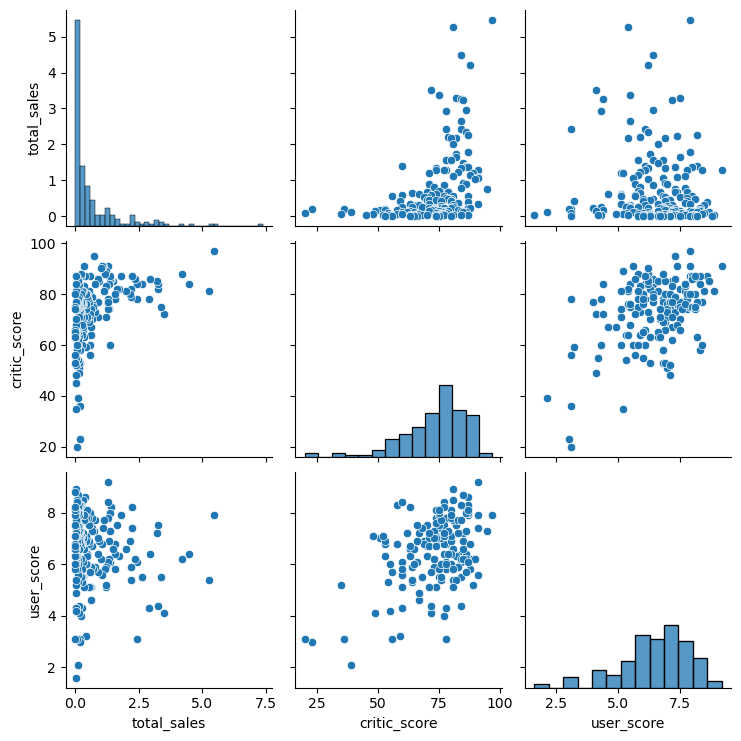

In [28]:
sns.pairplot(data[data.platform == "XOne"][['total_sales', 'critic_score', 'user_score']])
plt.show()

In [29]:
data[data.platform == "XOne"][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


**Корреляции между продажами и отзывами нет. А вот между оценкой критиков и продажами умеренная**

In [30]:
data[data.platform == "PS4"][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


**Корреляция с оценкой критиков умеренная**

In [31]:
data[data.platform == "PC"][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.257395,0.012905
critic_score,0.257395,1.000000,0.555199
user_score,0.012905,0.555199,1.000000


**Тут корреляция с оценкой критиков так же умеренная**

In [32]:
data[data.platform == "3DS"][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.348740,0.222078
critic_score,0.348740,1.000000,0.745222
user_score,0.222078,0.745222,1.000000


**Тут умеренная корреляция оценки пользователей и критиков**

In [33]:
data[data.platform == "WiiU"][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.34838,0.400219
critic_score,0.348380,1.00000,0.770080
user_score,0.400219,0.77008,1.000000


**Тут так же умеренная корреляция оценки пользователей и оценки критиков, но это первая платформа, на которой корреляция пользовательских оценок выше корреляции оценок критиков**

In [35]:
genre_group_sum = data_a.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values('total_sales', ascending=False)
genre_group_sum

,total_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


<AxesSubplot:xlabel='genre'>

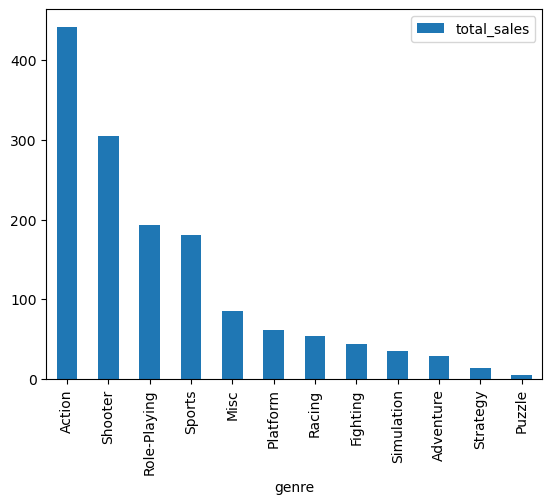

In [36]:
genre_group_sum.plot(kind='bar')

In [37]:
genre_group_mean = data_a.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'mean').sort_values('total_sales', ascending=False)

<AxesSubplot:xlabel='genre'>

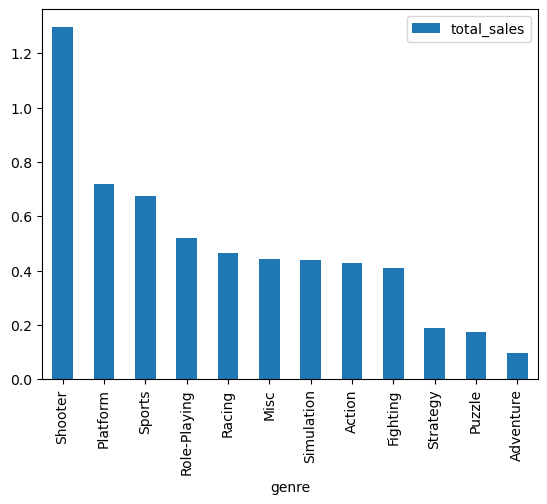

In [38]:
genre_group_mean.plot(kind='bar')

Самыми дорогими выходят шутеры, далее платформеры, а после спортивными, действительно игр жанра Экшн хоть и больше всего, но стоимость его ниже

### Шаг 4

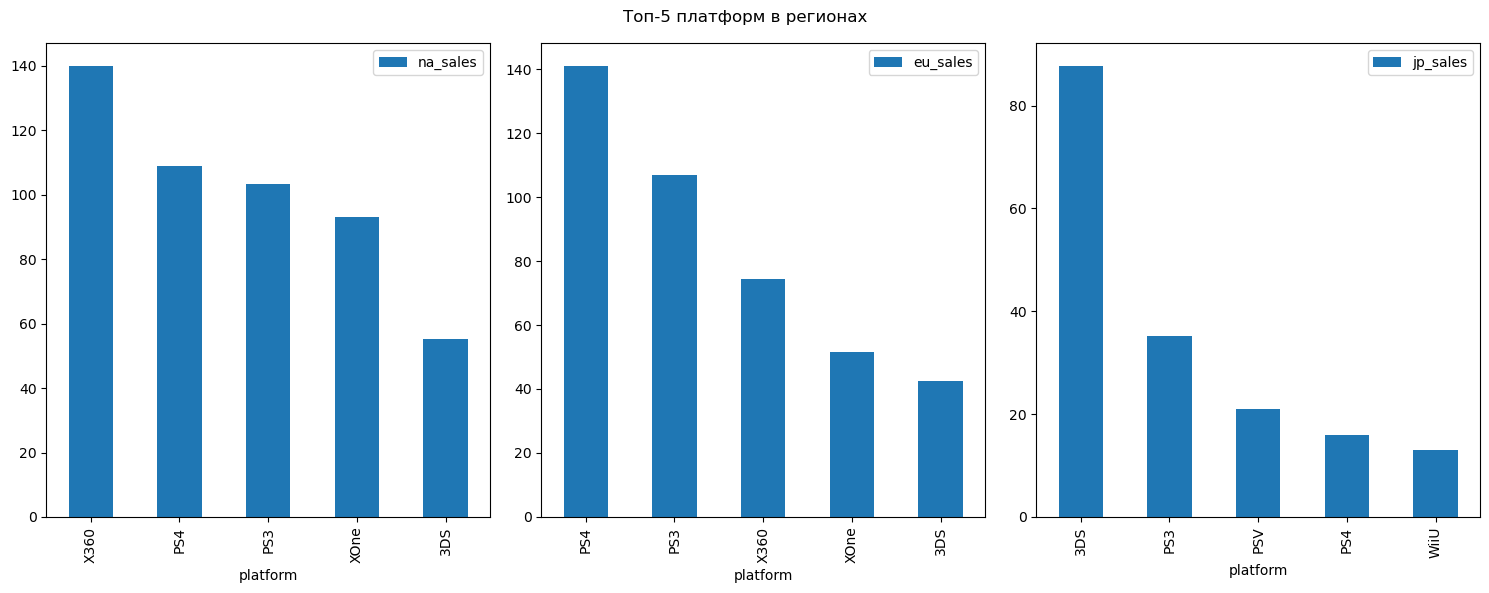

In [39]:
fig, ax = plt.subplots(1, 3, figsize= (15,6))
fig.suptitle('Топ-5 платформ в регионах')
for i, region in enumerate(['na_sales','eu_sales','jp_sales']):
    (data_a.pivot_table(index='platform', values=region, 
                                   aggfunc='sum').nlargest(5, region)).plot(kind = 'bar', ax = ax[i])
    plt.tight_layout()

Cамая популярная консоль X360 в Америке за все время. За все время после X360 популярны PS2, Wii, PS3 и DS
А из актуальных самые предпочтительные у Американцев после X360 это Wii, PS3, DS, PS2. Консоли остались те же, но более новые вышли по предпочтениям вперед

В Европе самая поулярная консоль PS4

В Японии самой популярной платформой является DS
Самая популярная со временем так и осталась DS, только на смену PS, PS2, SNEIS пришли PS3, PSP, Wii


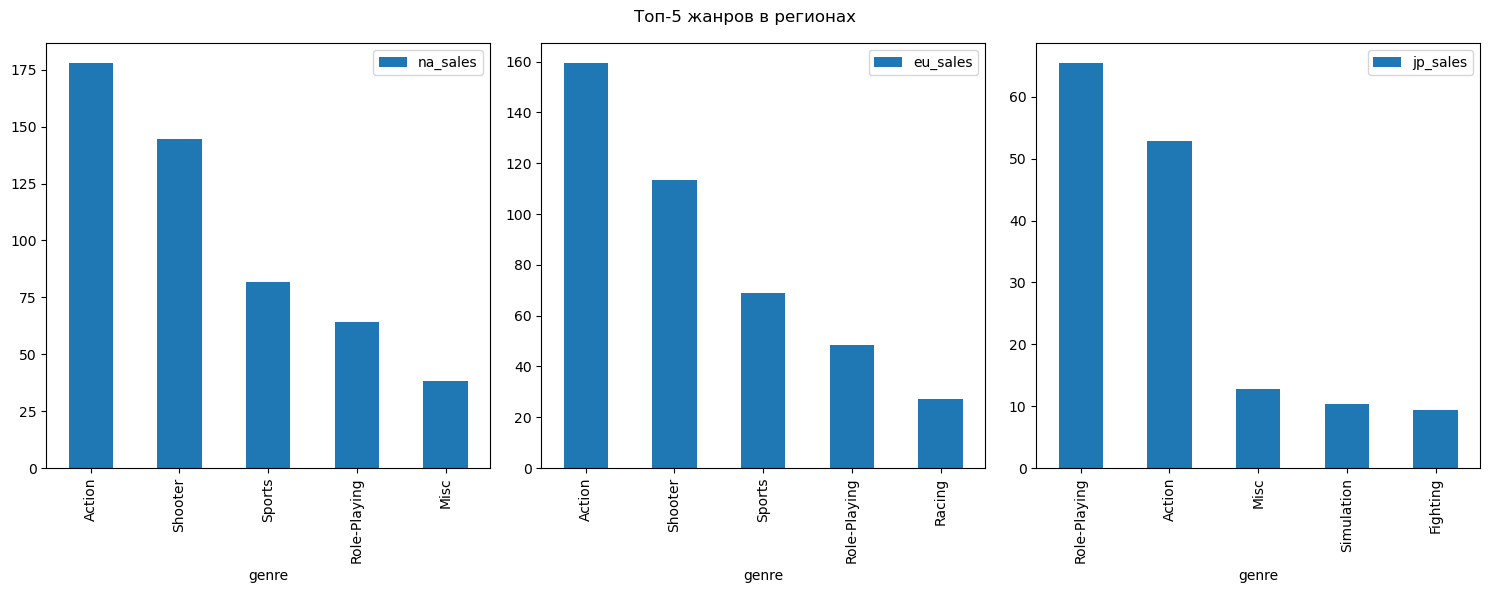

In [40]:
fig, ax = plt.subplots(1, 3, figsize= (15,6))
fig.suptitle('Топ-5 жанров в регионах')
for i, region in enumerate(['na_sales','eu_sales','jp_sales']):
    (data_a.pivot_table(index='genre', values=region, 
                                   aggfunc='sum').nlargest(5, region)).plot(kind = 'bar', ax = ax[i])
    plt.tight_layout()

В Америке и Европе предпочтения практически одинаковые и самый излюбленный жаннр это Экшн, единственное отличие, что Американцы предпочитают больше платформеры гонкам, а у Японцев самый любимый жанр и с отрывом от остальных это РПГ, и в топе нет шутеров

<AxesSubplot:xlabel='rating'>

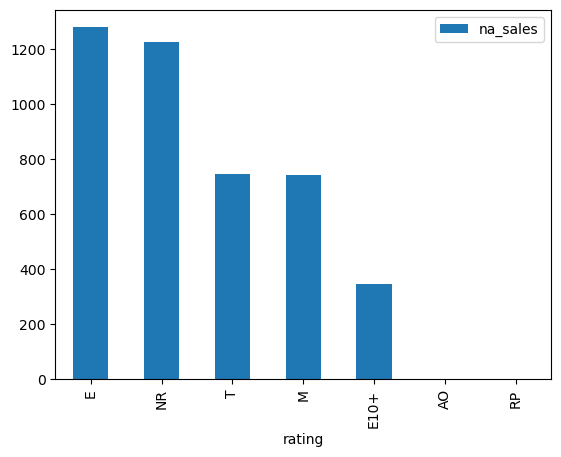

In [41]:
rating_na = data.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').sort_values(by='na_sales',ascending=False)
rating_na.plot(kind='bar')

В Америке самые продоваемые игры без возрастных категорий. Далее идут категории до 13 и 17 лет, они практически идентичны, а после для лиц старше 10-ти лет.
Игры без рейтинга не будем брать как отдельную категорию

<AxesSubplot:xlabel='rating'>

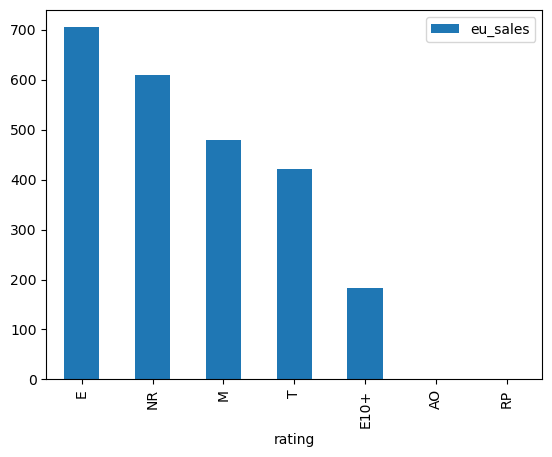

In [42]:
rating_eu = data.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values(by='eu_sales',ascending=False)
rating_eu.plot(kind='bar')

Идентичная ситуация с Америкой, только чуть популярнее игры от 17ти лет

<AxesSubplot:xlabel='rating'>

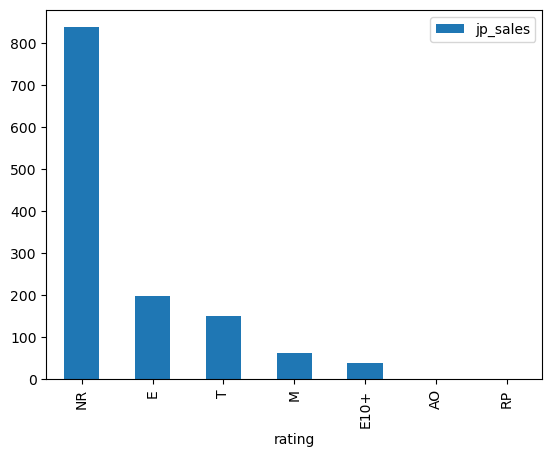

In [44]:
rating_jp = data.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').sort_values(by='jp_sales',ascending=False)
rating_jp.plot(kind='bar')

Самый популярный рейтинг остается такой же как и в других регионах, а на втором месте уже от 13 лет и имеет немногим меньше самого популярно, а вот рейтинг от 17ти лет уже не так популярен. Но как вы мне и подсказали, Японцы не очень доверительно относятся к рейтингу ESRB.

### Шаг 5

*Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC статистически значимо не различаются* \
*Альтернативная гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC статистически значимо различаются.*

In [46]:
sample_1 = data_a[data_a['platform']=="XOne"]['user_score'].dropna()
sample_2 = data_a[data_a['platform']=="PC"]['user_score'].dropna()
alpha = 0.05 
results = st.ttest_ind(sample_1,sample_2,equal_var=True)
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC статистически значимо н различаются')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC статистически значимо не различаются')

0.5535080500643661
Не получилось отвергнуть нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC статистически значимо не различаются


In [47]:
s_1 = data_a[data_a['genre']=="Action"]['user_score'].dropna()
s_2 = data_a[data_a['genre']=="Sports"]['user_score'].dropna()
alpha = 0.05 
results = st.ttest_ind(s_1,s_2,equal_var=True)
print(results.pvalue)
if results.pvalue < alpha:
    print('Не получилось отвергнуть нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports статистически значимо не различаются.')
else:
    print('Отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports статистически значимо различаются.')

3.7163089460934874e-26
Не получилось отвергнуть нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports статистически значимо не различаются.


**ОБЩИЙ ВЫВОД:** 
*Изучили датасет, подготовили данные, произвели иследовательский анализ данных, составили портрет регионов и проверили гипотезы. В подготовке данных привели названия столбцов к нижнему регистру, убрали незначительные пропуски в годах выпуска. Заменили пропущенные значения на пустые строки в 'name' и 'genre'. А так же преобразовали типы данных.*
   * Произведенный иследовательский анализ данных показал следующее:
    1. Игры начали обретать популярность с 1994 года.
    2. Самыми популярными платформами за все время являются PS2, Xbox 360, PS3, Wii, DS и PS
    3. В среднем одна платформа имеет свою актуальность 10 лет
    4. Выявили, что актуальный период начинается 2005 год, с выходом более современных консолей.
    5. Самые перспективные платформы для игр это PS4 и Xbox One к 2016 году.
    6. Самые высокие продажи, с оговорками на то что вышла раньше на год PS4 и Xbox one, из актуального периода имеет Wii.
    7. Корреляции между продажами Xbox One и отзывами нет. А вот между оценкой критиков и продажами 0.41
    8. С другими платформами корреляция практически схожа.
    9. Самые популярный жанр среди всех это Экша. На второме месте  Спорт, а на третьем шутеры.
    
    
**Портреты для регионов:**
   * Для Америки:
   1. Cамая популярная консоль X360 в Америке за все время. За все время после X360 популярны PS2, Wii, PS3 и DS
А из актуальных самые предпочтительные у Американцев после X360 это Wii, PS3, DS, PS2. Консоли остались те же, но более новые вышли по предпочтениям вперед.
   2. Топ жанров в Америке - Экшн, Спорт, Шутеры
   3. Топ рейтингов возрастных ограничениий - Для всех возрастных категорий, От 17ти лет, От 13 лет
   * Для Европы:
   1. В Европе за весь промежуток времени самой популярной консолью является PS2, а из актуальных PS3. Европейцы со временем предпочли платформам PS2 и PS, PS4 и DS.
   2. Топ жанров в Европе - Экшн, Спорт, Шутеры
   3. Топ рейтингов возрастных ограничениий - Для всех возрастных категорий, От 17ти лет, От 13 лет
   * Для Японии:
   1. В Японии самой популярной платформой является DS. Самая популярная со временем так и осталась DS, только на смену PS, PS2, SNEIS пришли PS3, PSP, Wii
   2. Топ жанров в Японии - РПГ, Экшн, Спорт.
   3. Топ рейтингов возрастных ограничениий - Для всех возрастных категорий, От 13 лет, от 17ти лет